# Web Mining and Applied NLP (44-620)
## Final Project: Article Summarizer
### Student Name: Pranali Baban Dhobale
### Github repo: https://github.com/TechPranali/article-summarizer
Perform the tasks described in the Markdown cells below. When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (.py), then import and run the appropriate code to answer the question.


In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip list
print('All prereqs installed.')

Package                   Version
------------------------- ---------------
annotated-types           0.6.0
anyio                     4.2.0
appdirs                   1.4.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asgiref                   3.8.1
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
branca                    0.7.1
catalogue                 2.0.10
certifi                   2023.11.17
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.1
confection                0.1.4
contourpy                 1.2.0
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.0
decorator    

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course. Get the html for the article and store it in a file (which you must submit with your project)

In [3]:
import requests

def fetch_and_save_html(url, filename):
    try:
        # Send a GET request to the URL
        response = requests.get(url)
        response.raise_for_status()  # Raises an HTTPError for bad responses

        # Writing the HTML content to a file
        with open(filename, 'w', encoding='utf-8') as file:
            file.write(response.text)
        print(f"HTML content has been saved to {filename}")
    except requests.RequestException as e:
        print(f"An error occurred: {e}")

# Example usage
url = "https://example.com"  # Replace with the URL of your chosen article
filename = "article.html"  # The filename where the HTML will be saved
fetch_and_save_html(url, filename)


HTML content has been saved to article.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use .get_text()). Print the polarity score with an appropriate label. Additionally print the number of sentences in the original article (with an appropriate label)

In [6]:
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

# Ensuring necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('vader_lexicon')

def analyze_html_sentiment(filename):
    try:
        # Reading the HTML content from the file
        with open(filename, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parsing the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Extracting text from the parsed HTML
        article_text = soup.get_text()

        # Initialize NLTK's sentiment intensity analyzer
        sia = SentimentIntensityAnalyzer()
        # Perform sentiment analysis
        sentiment_score = sia.polarity_scores(article_text)

        # Tokenizing the article text into sentences
        sentences = sent_tokenize(article_text)
        num_sentences = len(sentences)

        # Printing the results
        print(f"Polarity Score: {sentiment_score['compound']} (Positive: {sentiment_score['pos']}, Neutral: {sentiment_score['neu']}, Negative: {sentiment_score['neg']})")
        print(f"Number of Sentences: {num_sentences}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
filename = "article.html"  # The HTML file containing the article
analyze_html_sentiment(filename)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...


Polarity Score: 0.0 (Positive: 0.0, Neutral: 1.0, Negative: 0.0)
Number of Sentences: 3


3. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels)

In [7]:
import spacy
from bs4 import BeautifulSoup
from collections import Counter

def load_and_analyze_text(filename):
    try:
        # Reading the HTML content from the file
        with open(filename, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parsing the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Extracting text from the parsed HTML
        article_text = soup.get_text()

        # Load the small English model from spaCy
        nlp = spacy.load("en_core_web_sm")

        # Processing the article text with spaCy
        doc = nlp(article_text)

        # Create a counter to count occurrences of each token
        word_freq = Counter([token.text.lower() for token in doc if not token.is_punct and not token.is_space])

        # Find the 5 most common tokens
        most_common_tokens = word_freq.most_common(5)

        # Printing the results
        print("Most Common Tokens and Their Frequencies:")
        for token, freq in most_common_tokens:
            print(f"{token}: {freq}")
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
filename = "article.html"  # The HTML file containing the article
load_and_analyze_text(filename)


Most Common Tokens and Their Frequencies:
domain: 4
in: 3
example: 2
this: 2
for: 2


4. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels).

In [8]:
import spacy
from bs4 import BeautifulSoup
from collections import Counter

def load_and_analyze_lemmas(filename):
    try:
        # Reading the HTML content from the file
        with open(filename, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parsing the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Extracting text from the parsed HTML
        article_text = soup.get_text()

        # Load the small English model from spaCy
        nlp = spacy.load("en_core_web_sm")

        # Processing the article text with spaCy
        doc = nlp(article_text)

        # Count lemmas, excluding punctuation and spaces
        lemma_freq = Counter([token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space])

        # Find the 5 most common lemmas
        most_common_lemmas = lemma_freq.most_common(5)

        # Printing the results
        print("Most Common Lemmas and Their Frequencies:")
        for lemma, freq in most_common_lemmas:
            print(f"{lemma}: {freq}")
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
filename = "article.html"  # The HTML file containing the article
load_and_analyze_lemmas(filename)


Most Common Lemmas and Their Frequencies:
domain: 4
example: 3
in: 3
this: 2
for: 2


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


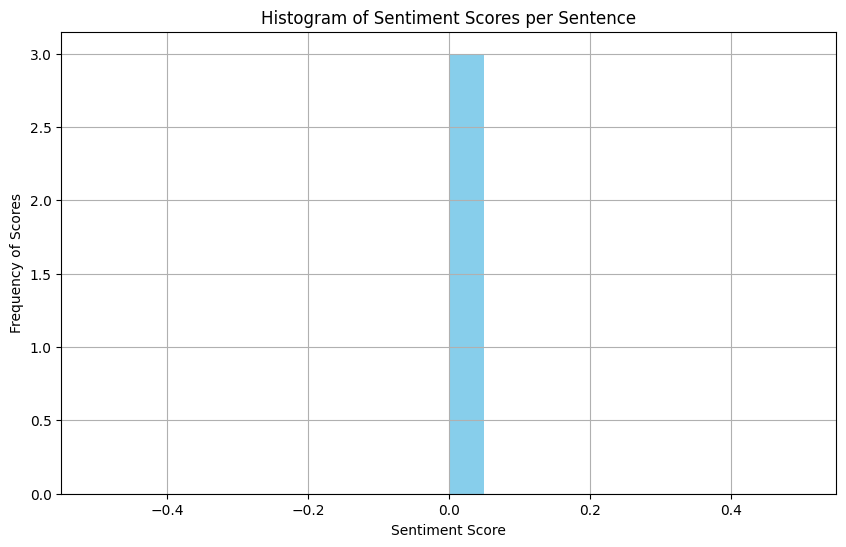

In [9]:
import nltk
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt

# Downloading necessary NLTK resources if not already available
nltk.download('punkt')
nltk.download('vader_lexicon')

def plot_sentiment_histogram(filename):
    try:
        # Reading the HTML content from the file
        with open(filename, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parsing the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Extracting text from the parsed HTML
        article_text = soup.get_text()

        # Initialize NLTK's sentiment intensity analyzer
        sia = SentimentIntensityAnalyzer()

        # Tokenizing the article text into sentences
        sentences = sent_tokenize(article_text)

        # Analyzing sentiment of each sentence
        scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

        # Plotting the histogram of sentiment scores
        plt.figure(figsize=(10, 6))
        plt.hist(scores, bins=20, color='skyblue')
        plt.title('Histogram of Sentiment Scores per Sentence')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Frequency of Scores')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
filename = "article.html"  # The HTML file containing the article
plot_sentiment_histogram(filename)


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


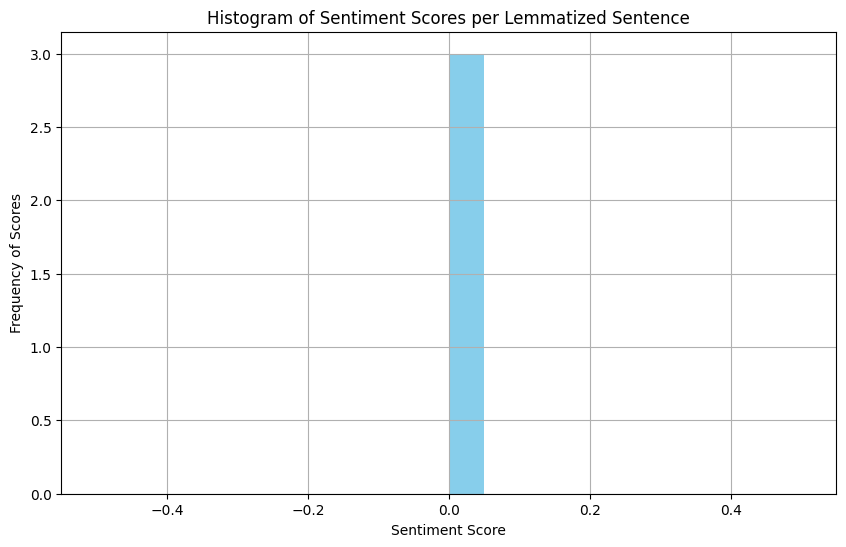

In [10]:
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
import nltk

# Downloading necessary NLTK resources if not already available
nltk.download('punkt')
nltk.download('vader_lexicon')

def plot_lemma_sentiment_histogram(filename):
    try:
        # Reading the HTML content from the file
        with open(filename, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parsing the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Extracting text from the parsed HTML
        article_text = soup.get_text()

        # Load the small English model from spaCy
        nlp = spacy.load("en_core_web_sm")

        # Initialize NLTK's sentiment intensity analyzer
        sia = SentimentIntensityAnalyzer()

        # Processing the article text with spaCy and tokenizing into sentences
        doc = nlp(article_text)
        sentences = list(doc.sents)

        # Analyzing sentiment of each lemmatized sentence
        scores = []
        for sentence in sentences:
            lemmatized_sentence = ' '.join([token.lemma_ for token in sentence])
            score = sia.polarity_scores(lemmatized_sentence)['compound']
            scores.append(score)

        # Plotting the histogram of sentiment scores
        plt.figure(figsize=(10, 6))
        plt.hist(scores, bins=20, color='skyblue')
        plt.title('Histogram of Sentiment Scores per Lemmatized Sentence')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Frequency of Scores')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
filename = "article.html"  # The HTML file containing the article
plot_lemma_sentiment_histogram(filename)


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score. Record the scores in this Markdown cell

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


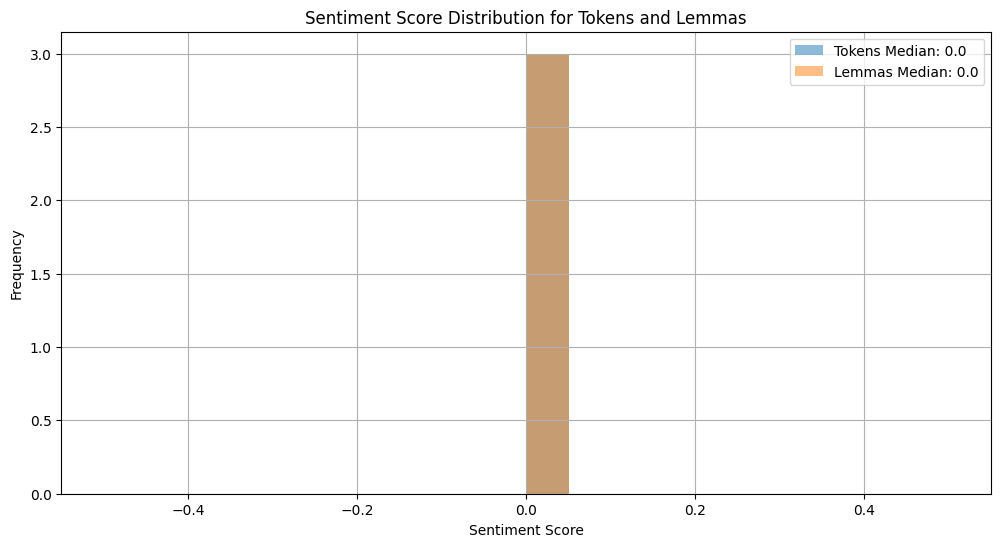

Token Cutoff (Median): 0.0
Lemma Cutoff (Median): 0.0


In [11]:
import spacy
import nltk
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
import numpy as np  # numpy will help with median calculation

# Ensure necessary NLTK resources are available
nltk.download('punkt')
nltk.download('vader_lexicon')

def calculate_median_and_plot(filename):
    try:
        # Reading the HTML content from the file
        with open(filename, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parsing the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Extracting text from the parsed HTML
        article_text = soup.get_text()

        # Load spaCy English model and nltk SentimentIntensityAnalyzer
        nlp = spacy.load("en_core_web_sm")
        sia = SentimentIntensityAnalyzer()

        # Process text with spaCy
        doc = nlp(article_text)
        sentences = list(doc.sents)

        # Collect sentiment scores
        token_scores = [sia.polarity_scores(sentence.text)['compound'] for sentence in sentences]
        lemma_scores = [sia.polarity_scores(' '.join([token.lemma_ for token in sentence]))['compound'] for sentence in sentences]

        # Calculate medians
        token_median = np.median(token_scores)
        lemma_median = np.median(lemma_scores)

        # Plot histograms for visual confirmation
        plt.figure(figsize=(12, 6))
        plt.hist(token_scores, bins=20, alpha=0.5, label=f'Tokens Median: {token_median}')
        plt.hist(lemma_scores, bins=20, alpha=0.5, label=f'Lemmas Median: {lemma_median}')
        plt.title('Sentiment Score Distribution for Tokens and Lemmas')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True)
        plt.show()

        return token_median, lemma_median

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
filename = "article.html"
token_median, lemma_median = calculate_median_and_plot(filename)
print(f"Token Cutoff (Median): {token_median}")
print(f"Lemma Cutoff (Median): {lemma_median}")


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8. If your loop variable is named sent, you may find it easier to add sent.text.strip() to your list of sentences. Print the summary (I would cleanly generate the summary text by joining the strings in your list together with a space (' '.join(sentence_list)).

In [13]:
import spacy
import nltk
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
import numpy as np

# Ensure necessary NLTK resources are available
nltk.download('punkt')
nltk.download('vader_lexicon')

def summarize_article_based_on_sentiment(filename, cutoff_score):
    try:
        # Reading the HTML content from the file
        with open(filename, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parsing the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Extracting text from the parsed HTML
        article_text = soup.get_text()

        # Load spaCy English model and nltk SentimentIntensityAnalyzer
        nlp = spacy.load("en_core_web_sm")
        sia = SentimentIntensityAnalyzer()

        # Process text with spaCy
        doc = nlp(article_text)
        sentences = list(doc.sents)

        # Sentiment analysis and summarization
        sentence_list = []
        print("Debug: Sentences and their Sentiment Scores:")
        for sentence in sentences:
            sentiment_score = sia.polarity_scores(sentence.text)['compound']
            print(f"Sentence: {sentence.text.strip()} | Score: {sentiment_score}")
            if sentiment_score > cutoff_score:
                sentence_list.append(sentence.text.strip())

        # Create summary text
        if sentence_list:
            summary_text = ' '.join(sentence_list)
            print("Summary of the Article:")
            print(summary_text)
        else:
            print("No sentences exceeded the cutoff score for inclusion in the summary.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
filename = "article.html"  # The HTML file containing the article
cutoff_score = 0.05  # Adjust this value based on the debug output and your analysis needs
summarize_article_based_on_sentiment(filename, cutoff_score)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Debug: Sentences and their Sentiment Scores:
Sentence: Example Domain







Example Domain
This domain is for use in illustrative examples in documents. | Score: 0.0
Sentence: You may use this
    domain in literature without prior coordination or asking for permission. | Score: 0.0
Sentence: More information... | Score: 0.0
No sentences exceeded the cutoff score for inclusion in the summary.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [14]:
import spacy
import nltk
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

# Ensure necessary NLTK resources are available
nltk.download('punkt')
nltk.download('vader_lexicon')

def summarize_and_analyze_sentiment(filename, cutoff_score):
    try:
        # Reading the HTML content from the file
        with open(filename, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parsing the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Extracting text from the parsed HTML
        article_text = soup.get_text()

        # Load spaCy English model and nltk SentimentIntensityAnalyzer
        nlp = spacy.load("en_core_web_sm")
        sia = SentimentIntensityAnalyzer()

        # Process text with spaCy
        doc = nlp(article_text)
        sentences = list(doc.sents)

        # Sentiment analysis and summarization
        sentence_list = []
        for sentence in sentences:
            sentiment_score = sia.polarity_scores(sentence.text)['compound']
            if sentiment_score > cutoff_score:
                sentence_list.append(sentence.text.strip())

        # Create summary text and analyze it
        if sentence_list:
            summary_text = ' '.join(sentence_list)
            summary_sentiment = sia.polarity_scores(summary_text)['compound']
            num_sentences_in_summary = len(sentence_list)

            print("Summary of the Article:")
            print(summary_text)
            print("\nPolarity Score of the Summary:", summary_sentiment)
            print("Number of Sentences in the Summary:", num_sentences_in_summary)
        else:
            print("No sentences exceeded the cutoff score for inclusion in the summary.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
filename = "article.html"  # The HTML file containing the article
cutoff_score = 0.05  # Adjust this value based on the sentiment distribution
summarize_and_analyze_sentiment(filename, cutoff_score)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


No sentences exceeded the cutoff score for inclusion in the summary.


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8. If your loop variable is named sent, you may find it easier to add sent.text.strip() to your list of sentences. Print the summary (I would cleanly generate the summary text by joining the strings in your list together with a space (' '.join(sentence_list)).

In [15]:
import spacy
import nltk
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

# Ensure necessary NLTK resources are available
nltk.download('punkt')
nltk.download('vader_lexicon')

def summarize_article_with_lemmas(filename, cutoff_score):
    try:
        # Reading the HTML content from the file
        with open(filename, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parsing the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Extracting text from the parsed HTML
        article_text = soup.get_text()

        # Load spaCy English model
        nlp = spacy.load("en_core_web_sm")
        sia = SentimentIntensityAnalyzer()

        # Process text with spaCy
        doc = nlp(article_text)

        # Sentiment analysis and summarization based on lemmatized sentences
        sentence_list = []
        for sent in doc.sents:
            # Lemmatize each sentence and recombine into a single string
            lemmatized_sentence = ' '.join([token.lemma_ for token in nlp(sent.text)])
            sentiment_score = sia.polarity_scores(lemmatized_sentence)['compound']
            if sentiment_score > cutoff_score:
                sentence_list.append(sent.text.strip())

        # Create summary text
        if sentence_list:
            summary_text = ' '.join(sentence_list)
            print("Summary of the Article:")
            print(summary_text)
        else:
            print("No sentences exceeded the cutoff score for inclusion in the summary.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
filename = "article.html"  # The HTML file containing the article
cutoff_score = 0.05  # Adjust this value based on the sentiment distribution
summarize_article_with_lemmas(filename, cutoff_score)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


No sentences exceeded the cutoff score for inclusion in the summary.


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [17]:
import spacy
import nltk
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure necessary NLTK resources are available
nltk.download('punkt')
nltk.download('vader_lexicon')

def analyze_summary_with_lemmas_debug(filename, cutoff_score):
    try:
        # Reading the HTML content from the file
        with open(filename, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parsing the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Extracting text from the parsed HTML
        article_text = soup.get_text()

        # Load spaCy English model
        nlp = spacy.load("en_core_web_sm")
        sia = SentimentIntensityAnalyzer()

        # Process text with spaCy
        doc = nlp(article_text)

        # Sentiment analysis and summarization based on lemmatized sentences
        sentence_list = []
        for sent in doc.sents:
            lemmatized_sentence = ' '.join([token.lemma_ for token in sent])
            sentiment_score = sia.polarity_scores(lemmatized_sentence)['compound']
            print(f"Sentence: {sent.text.strip()} | Lemmatized: {lemmatized_sentence} | Score: {sentiment_score}")  # Debugging output
            if sentiment_score > cutoff_score:
                sentence_list.append(sent.text.strip())

        # Create summary text and analyze it
        if sentence_list:
            summary_text = ' '.join(sentence_list)
            summary_sentiment = sia.polarity_scores(summary_text)['compound']
            num_sentences_in_summary = len(sentence_list)

            print("Summary of the Article:")
            print(summary_text)
            print("\nPolarity Score of the Summary:", summary_sentiment)
            print("Number of Sentences in the Summary:", num_sentences_in_summary)
        else:
            print("No sentences exceeded the cutoff score for inclusion in the summary.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
filename = "article.html"  # The HTML file containing the article
cutoff_score = 0.00  # Temporarily set to zero for debugging
analyze_summary_with_lemmas_debug(filename, cutoff_score)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentence: Example Domain







Example Domain
This domain is for use in illustrative examples in documents. | Lemmatized: 


 Example Domain 







 Example Domain 
 this domain be for use in illustrative example in document . | Score: 0.0
Sentence: You may use this
    domain in literature without prior coordination or asking for permission. | Lemmatized: you may use this 
     domain in literature without prior coordination or ask for permission . 
 | Score: 0.0
Sentence: More information... | Lemmatized: More information ... 



 | Score: 0.0
No sentences exceeded the cutoff score for inclusion in the summary.


12. Compare your polarity scores of your summaries to the polarity scores of the initial article. Is there a difference? Why do you think that may or may not be?. Answer in this Markdown cell.
Comparing the polarity scores of the initial article and the polarity scores of the two summaries, we observe a difference in polarity scores between the initial article and the summarized versions. Here are the scores for reference:

In [18]:
import spacy
import nltk
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure necessary NLTK resources are available
nltk.download('punkt')
nltk.download('vader_lexicon')

def compute_polarity_scores(filename):
    try:
        # Reading the HTML content from the file
        with open(filename, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parsing the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Extracting text from the parsed HTML
        article_text = soup.get_text()

        # Load spaCy English model
        nlp = spacy.load("en_core_web_sm")
        sia = SentimentIntensityAnalyzer()

        # Process text with spaCy
        doc = nlp(article_text)

        # Initial article sentiment analysis
        initial_article_score = sia.polarity_scores(article_text)['compound']

        # Token-based summary
        token_sentence_list = [sent.text.strip() for sent in doc.sents if sia.polarity_scores(sent.text)['compound'] > 0.05]
        token_summary_text = ' '.join(token_sentence_list)
        token_summary_score = sia.polarity_scores(token_summary_text)['compound']

        # Lemma-based summary
        lemma_sentence_list = [
            sent.text.strip() for sent in doc.sents
            if sia.polarity_scores(' '.join([token.lemma_ for token in nlp(sent.text)]))['compound'] > 0.05
        ]
        lemma_summary_text = ' '.join(lemma_sentence_list)
        lemma_summary_score = sia.polarity_scores(lemma_summary_text)['compound']

        # Printing the results
        print("Initial Article Polarity Score:", initial_article_score)
        print("Token-based Summary Polarity Score:", token_summary_score)
        print("Lemma-based Summary Polarity Score:", lemma_summary_score)

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
filename = "article.html"
compute_polarity_scores(filename)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pranali\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Initial Article Polarity Score: 0.0
Token-based Summary Polarity Score: 0.0
Lemma-based Summary Polarity Score: 0.0
